In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#import data from csv files
file1="train.csv"
file2="test.csv"
train = pd.read_csv(file1)
test = pd.read_csv(file2)
print(train.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
3         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
4         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008     

In [8]:
print(train.describe())
print(test.describe())

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000

In [9]:
#save prediction house price label
train_house_price = train['SalePrice']
#drop sale price columns
#train= train.drop(columns='SalePrice')
type(train)

pandas.core.frame.DataFrame

We have 2 types of feature data: 
1. numerical features. MSSubClass, which "identifies the type of dwelling involved in the sale", is encoded as numeric but is in reality a categorical variable.
2. Categorical features.
I want to seperate those features into 2 dataframe

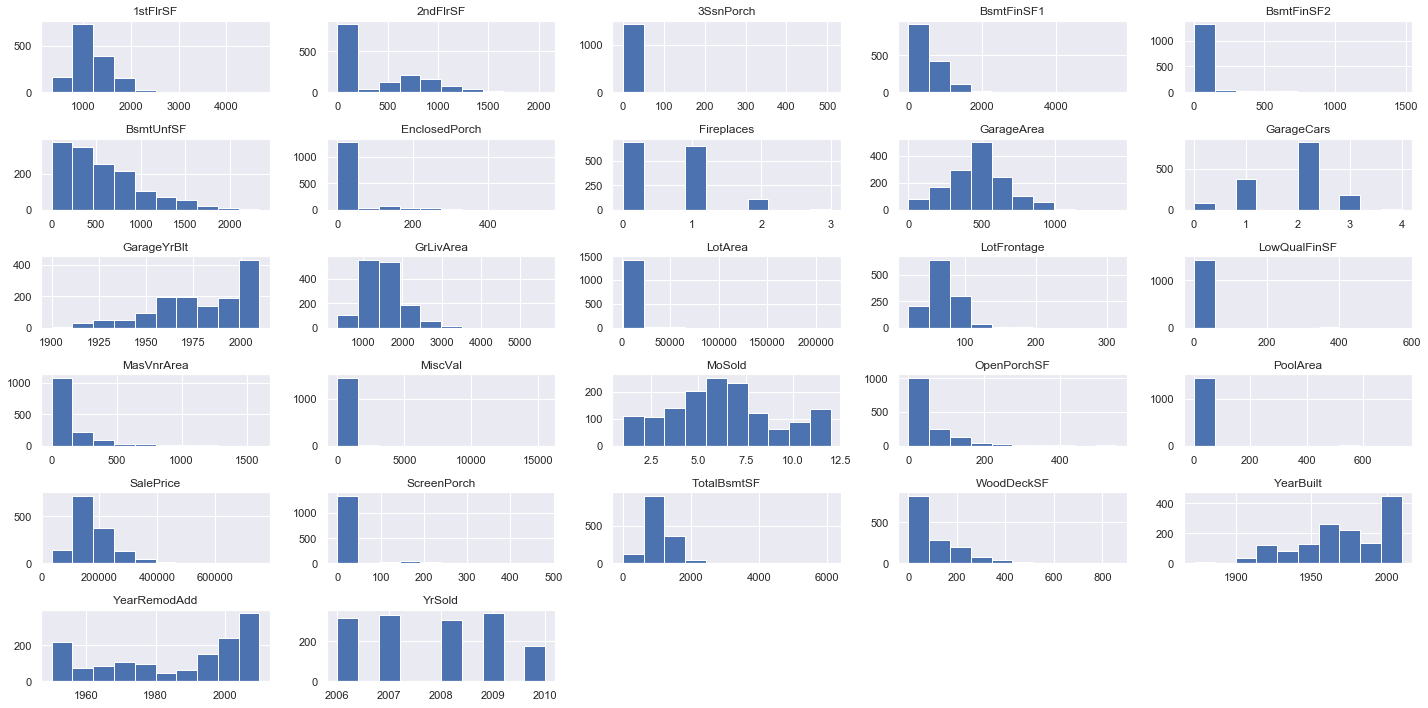

In [15]:
numerical_feat= train[['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF',
                       '1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF',
                      'EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold',
                      'GarageCars','GarageYrBlt','Fireplaces','YearBuilt','YearRemodAdd','SalePrice']]
#plot histogram for each numerical feature
numerical_feat.hist()
plt.tight_layout()

plt.show()

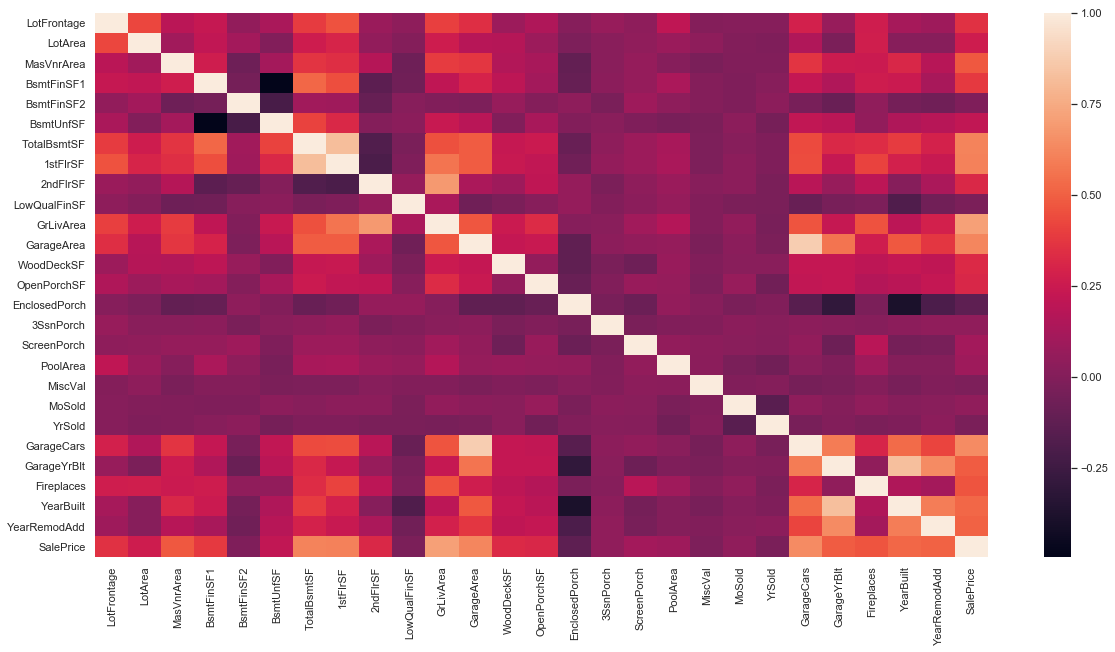

In [11]:
#plot heatmap of correlation of each column
corr = numerical_feat.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

In [12]:
#sns.pairplot(numerical_feat)
#plt.show()

In [13]:
cate_feat=train[['MSSubClass','MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig',
                'LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','OverallQual',
                'OverallCond','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond',
                'Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC',
                'CentralAir','Electrical','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr',
                'KitchenQual','TotRmsAbvGrd','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual',
                'GarageCond','PavedDrive','PoolQC','Fence','SaleType','SaleCondition','SalePrice']]
cate_feat.head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,SaleType,SaleCondition,SalePrice
0,60,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,WD,Normal,208500
1,20,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,Attchd,RFn,TA,TA,Y,NaN,NaN,WD,Normal,181500
2,60,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,WD,Normal,223500
3,70,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,Detchd,Unf,TA,TA,Y,NaN,NaN,WD,Abnorml,140000
4,60,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,Attchd,RFn,TA,TA,Y,NaN,NaN,WD,Normal,250000


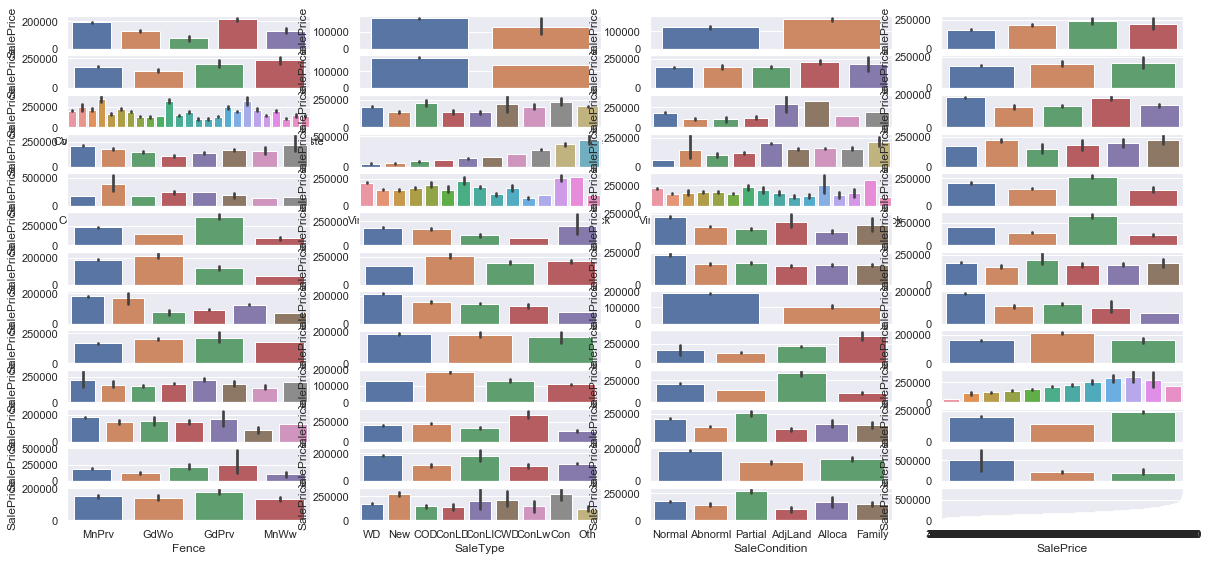

In [14]:
#plot bar chart for Categorical features
for i in range(1,53):
    plt.subplot(14, 4, i)
    sns.barplot(x=cate_feat.iloc[:,i],y=cate_feat['SalePrice'])    

plt.figure(figsize=(20,850))
plt.tight_layout()    
plt.show()